# Importing Library



In [1]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preparation

Dataset yang digunakan adalah data dari twitter mengenai film Dune (2021)

In [6]:
# Load in the dataframe
df = pd.read_csv("/content/drive/MyDrive/Visdat/Dune_(2021).csv", index_col=0)

In [7]:
df.drop('title', axis = 1, inplace = True)
df.drop('tweet_type', axis = 1, inplace = True)
df.head()

,link,author,description,pubdate,source,favorite_count,retweet_count,user_id,user_friends_count,user_followers_count,user_location
tweetid,,,,,,,,,,,
1.465980e+18,https://twitter.com/yeetbeete/statuses/1465979...,yeetbeete,@letterboxd Out of Sight (1998) The Harder The...,12/1/2021 4:43,Twitter for iPhone,0,0,3.904261e+09,1609,99,Kugane (Eorzea)
1.465980e+18,https://twitter.com/vinidsmonteiro/statuses/14...,vinidsmonteiro,Timothée Chamalet is everywhere I\'ve watched ...,12/1/2021 4:38,Twitter Web App,0,0,1.144000e+18,816,331,"Dublin City, Ireland"
1.465980e+18,https://twitter.com/BenitezLeonelR/statuses/14...,BenitezLeonelR,Autumn Sonata (1978) The Heiress (1949) Corpus...,12/1/2021 4:34,Twitter for Android,0,0,7.996800e+17,477,207,Fargo
1.465980e+18,https://twitter.com/ErasedMemories4/statuses/1...,ErasedMemories4,What was your 2021 Movie Highlight? Mine was D...,12/1/2021 4:30,Twitter Web App,0,0,1.392060e+18,506,919,Hamburg
1.465980e+18,https://twitter.com/BlaqSmooch/statuses/146597...,BlaqSmooch,2021 Popular movies released in OCTOBER that y...,12/1/2021 4:27,Twitter for Android,0,1500,3.108439e+09,698,534,Durban


In [8]:
df_new = df.reset_index(level=['tweetid'])
df_new.head()

,tweetid,link,author,description,pubdate,source,favorite_count,retweet_count,user_id,user_friends_count,user_followers_count,user_location
0,1.465980e+18,https://twitter.com/yeetbeete/statuses/1465979...,yeetbeete,@letterboxd Out of Sight (1998) The Harder The...,12/1/2021 4:43,Twitter for iPhone,0,0,3.904261e+09,1609,99,Kugane (Eorzea)
1,1.465980e+18,https://twitter.com/vinidsmonteiro/statuses/14...,vinidsmonteiro,Timothée Chamalet is everywhere I\'ve watched ...,12/1/2021 4:38,Twitter Web App,0,0,1.144000e+18,816,331,"Dublin City, Ireland"
2,1.465980e+18,https://twitter.com/BenitezLeonelR/statuses/14...,BenitezLeonelR,Autumn Sonata (1978) The Heiress (1949) Corpus...,12/1/2021 4:34,Twitter for Android,0,0,7.996800e+17,477,207,Fargo
3,1.465980e+18,https://twitter.com/ErasedMemories4/statuses/1...,ErasedMemories4,What was your 2021 Movie Highlight? Mine was D...,12/1/2021 4:30,Twitter Web App,0,0,1.392060e+18,506,919,Hamburg
4,1.465980e+18,https://twitter.com/BlaqSmooch/statuses/146597...,BlaqSmooch,2021 Popular movies released in OCTOBER that y...,12/1/2021 4:27,Twitter for Android,0,1500,3.108439e+09,698,534,Durban


In [9]:
print("There are {} observations and {} features in this dataset. \n".format(df_new.shape[0],df_new.shape[1]))

print("There are {} authors in this dataset such as {}... \n".format(len(df_new.author.unique()), 
                                                                           ", ".join(df_new.author.unique()[0:5])))

print("There are {} description of Dune(2021) in this dataset such as {}... \n".format(len(df_new.description.unique()), 
                                                                            ", ".join(df_new.description.unique()[0:5])))

There are 2500 observations and 12 features in this dataset. 

There are 2267 authors in this dataset such as yeetbeete, vinidsmonteiro, BenitezLeonelR, ErasedMemories4, BlaqSmooch... 

There are 812 description of Dune(2021) in this dataset such as @letterboxd Out of Sight (1998) The Harder They Fall (2021) Passing (2021) Dune (2021) https://t.co/Toyw37dkwp, Timothée Chamalet is everywhere I\'ve watched recently!  Dune(2021) Little women (2019) The king (2019) Don\'t look up (2021; trailer)  Is this like a contract with the movie industry?, Autumn Sonata (1978) The Heiress (1949) Corpus Christi (2019) Dune (2021). https://t.co/UXhqDrxTpD https://t.co/qYp8hYXW9a, What was your 2021 Movie Highlight? Mine was DUNE!, 2021 Popular movies released in OCTOBER that you must watch  Thread.....  1. Dune........Army Of Thieves https://t.co/OoULJhqxnE... 



In [59]:
df_new[["author", "description","pubdate", "user_location"]].head()

,author,description,pubdate,user_location
0,yeetbeete,@letterboxd Out of Sight (1998) The Harder The...,12/1/2021 4:43,Kugane (Eorzea)
1,vinidsmonteiro,Timothée Chamalet is everywhere I\'ve watched ...,12/1/2021 4:38,"Dublin City, Ireland"
2,BenitezLeonelR,Autumn Sonata (1978) The Heiress (1949) Corpus...,12/1/2021 4:34,Fargo
3,ErasedMemories4,What was your 2021 Movie Highlight? Mine was D...,12/1/2021 4:30,Hamburg
4,BlaqSmooch,2021 Popular movies released in OCTOBER that y...,12/1/2021 4:27,Durban


In [11]:
# Groupby by author
people = df_new.groupby("author")

# Summary statistic of all authors
people.describe().head()

tweetid                    ... user_followers_count              
                  count          mean std  ...                  50%    75%    max
author                                     ...                                   
1057Ethan           1.0  1.465160e+18 NaN  ...                 36.0   36.0   36.0
19miktul            1.0  1.465670e+18 NaN  ...                 42.0   42.0   42.0
1KingSports         1.0  1.464800e+18 NaN  ...                904.0  904.0  904.0
1_of_the_finest     1.0  1.464880e+18 NaN  ...                938.0  938.0  938.0
1larne_             1.0  1.465070e+18 NaN  ...                365.0  365.0  365.0

[5 rows x 48 columns]

In [12]:
people.mean().sort_values(by="retweet_count",ascending=False).head()

,tweetid,favorite_count,retweet_count,user_id,user_friends_count,user_followers_count
author,,,,,,
dune_diggory,1.465785e+18,0.0,122665.833333,1.133050e+18,408.0,76.0
Dune_NFT,1.465040e+18,0.0,19450.000000,1.458380e+18,69.0,5.0
mp3tatee,1.465560e+18,0.0,18455.000000,1.461470e+18,102.0,57.0
_angie_g_,1.464860e+18,0.0,18455.000000,7.376810e+17,89.0,20.0
grewiozrmcf,1.465810e+18,0.0,1683.000000,3.378984e+09,644.0,1231.0


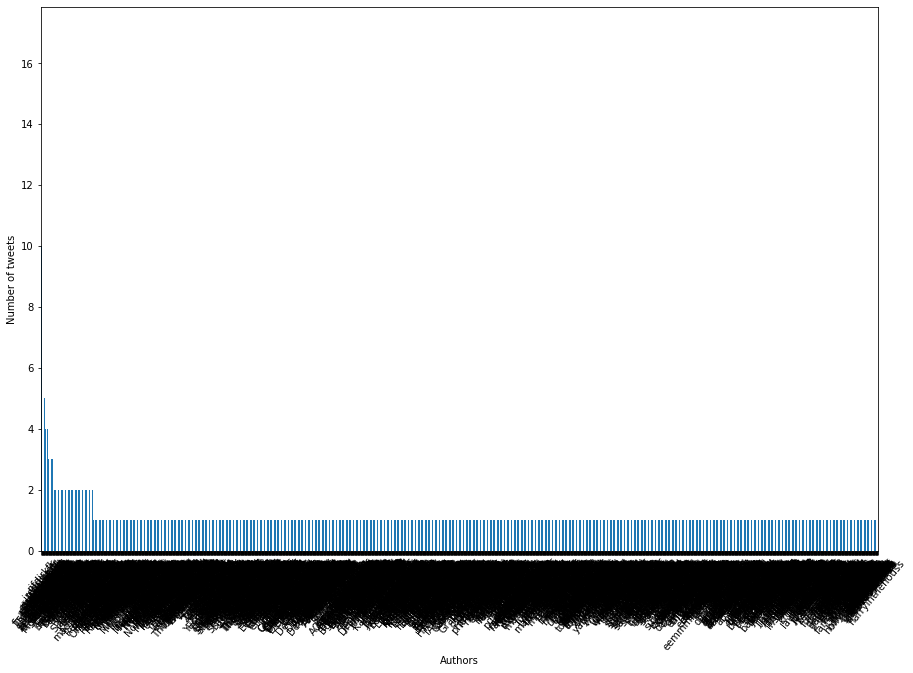

In [13]:
plt.figure(figsize=(15,10))
people.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Authors")
plt.ylabel("Number of tweets")
plt.show()

In [14]:
people.max

<bound method GroupBy.max of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f4aacb11b90>>

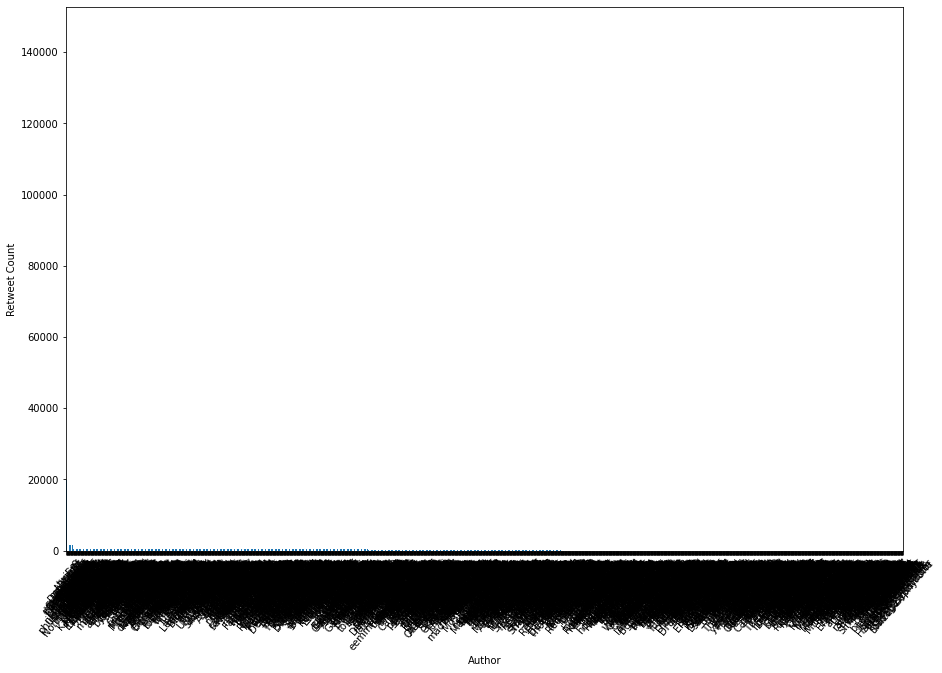

In [65]:
plt.figure(figsize=(15,10))
people.max(numeric_only=True, min_count=-1).sort_values(by="retweet_count",ascending=False)["retweet_count"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Author")
plt.ylabel("Retweet Count")
plt.show()

# Creating Word Cloud

@letterboxd Out of Sight (1998) The Harder They Fall (2021) Passing (2021) Dune (2021) https://t.co/Toyw37dkwp


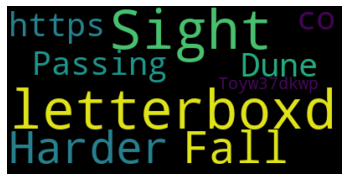

In [18]:
text = df_new.description[0]
print(text)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# # Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

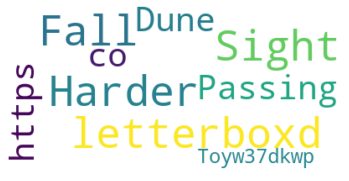

In [19]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [20]:
# Save the image in the img folder:
wordcloud.to_file("first_review.png")

In [21]:
text = " ".join(review for review in df_new.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 319021 words in the combination of all review.


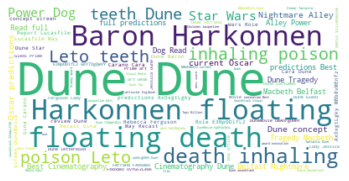

In [22]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["https", "DkOZG2q941", "barcode", "condensed", "frame", "CO", "WmSSwEQLGr", "Compared", "Via", "re", "View", "Rick_Proza", "d4bmbs23DM", "Every", "Nightmare Alley"])

# # Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# # Display the generated image:
# # the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
dune_mask = np.array(Image.open("/content/drive/MyDrive/Visdat/cryskinfe1.png"))
dune_mask

array([[[  0,   0,   0, 255],
        [  1,   1,   1, 255],
        [  1,   1,   1, 255],
        ...,
        [  1,   1,   1, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  1,   1,   1, 255],
        [  0,   0,   0, 255],
        [  1,   1,   1, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  1,   1,   1, 255],
        [  1,   1,   1, 255],
        [  1,   1,   1, 255]],

       ...,

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  1,   1,   1, 255],
        ...,
        [  1,   1,   1, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  1,   1,   1, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  1

In [39]:
def transform_format(val):
    if val == -16777216:
        return 255
    else:
        return val

In [38]:
# Transform your mask into a new one that will work with the function:
transformed_dune_mask = np.ndarray((dune_mask.shape[0],dune_mask.shape[1]), np.int32)
transformed_dune_mask

array([[-16777216, -16711423, -16711423, ..., -16711423, -16777216,
        -16777216],
       [-16777216, -16777216, -16777216, ..., -16711423, -16777216,
        -16711423],
       [-16777216, -16777216, -16777216, ..., -16711423, -16711423,
        -16711423],
       ...,
       [-16777216, -16777216, -16711423, ..., -16711423, -16777216,
        -16777216],
       [-16777216, -16711423, -16777216, ..., -16777216, -16777216,
        -16777216],
       [-16711423, -16711423, -16711423, ..., -16777216, -16711423,
        -16777216]], dtype=int32)

In [40]:
# Transform your mask into a new one that will work with the function:
transformed_dune2_mask = np.ndarray((transformed_dune_mask.shape[0],transformed_dune_mask.shape[1]), np.int32)

for i in range(len(transformed_dune_mask)):
    transformed_dune2_mask[i] = list(map(transform_format, transformed_dune_mask[i]))
transformed_dune2_mask

array([[      255, -16711423, -16711423, ..., -16711423,       255,
              255],
       [      255,       255,       255, ..., -16711423,       255,
        -16711423],
       [      255,       255,       255, ..., -16711423, -16711423,
        -16711423],
       ...,
       [      255,       255, -16711423, ..., -16711423,       255,
              255],
       [      255, -16711423,       255, ...,       255,       255,
              255],
       [-16711423, -16711423, -16711423, ...,       255, -16711423,
              255]], dtype=int32)

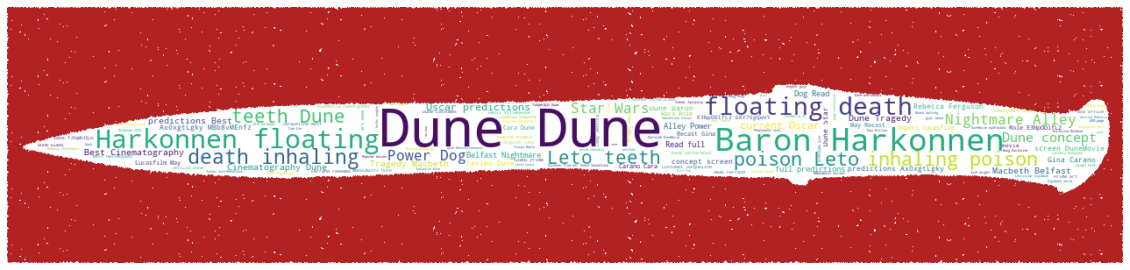

In [41]:
# Create a word cloud image
wc2 = WordCloud(background_color="white", max_words=1000, mask=transformed_dune2_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc2.generate(text)

# store to file
wc2.to_file("/content/drive/MyDrive/Visdat/cryskinfe1.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.show()